In [36]:
#Programación convencional, formula para convertir grados celcius a fahrenheit
def convertir(c):
  f = c * 1.8 + 32
  return f

In [37]:
celcius = [-40, -10, 0, 30, 40, 50, 60, 70, 80, 90, 100]

# list comprehension, solo para hacer la conversión a fahrenheit y preparar los datos de entrada
fahrenheit = [ convertir(c) for c in celcius ]
fahrenheit

[-40.0, 14.0, 32.0, 86.0, 104.0, 122.0, 140.0, 158.0, 176.0, 194.0, 212.0]

In [38]:
import pandas as pd

# Conjunto de datos de entrenamiento
datos = pd.DataFrame({"celsius": celcius, "fahrenheit": fahrenheit})

In [39]:
datos.head() # visualizar los datos del DF

,celsius,fahrenheit
0,-40,-40.0
1,-10,14.0
2,0,32.0
3,30,86.0
4,40,104.0


<Axes: xlabel='celsius', ylabel='fahrenheit'>

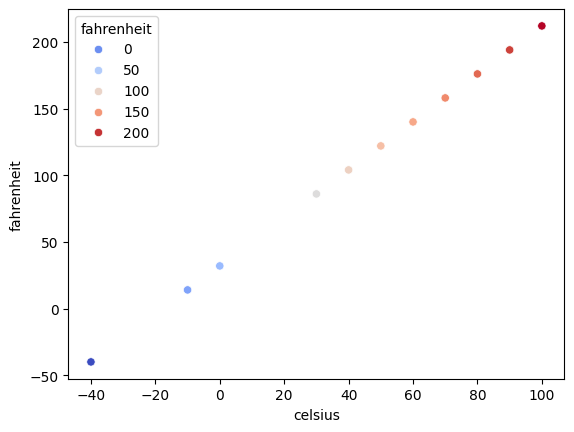

In [40]:
# Los graficos son una buena forma de poder ver como se comportan los datos
# En este caso, se usa la libreria "seaborn", donde se puede ver la relación
# entre grados celcius y fahrenheit, se puede ver una linea perfecta debido a la
# relación 1 a 1 de los datos

import seaborn as sb

sb.scatterplot(x="celsius", y="fahrenheit", data=datos,
               hue="fahrenheit", palette="coolwarm")

In [41]:
#Preparamos los datos para el entrenamiento
#Caracteristicas (X), etiqueta (y)
X = datos["celsius"]
y = datos["fahrenheit"]

In [42]:
#Este ejercicio es bastante sencillo y no hay que hacer ningun analisis, sin embargo,
#Los modelos requieren un formato especifico, en este caso, un arreglo de arreglos

#Actualmente los datos se ven asi
# [-40, -10, 0, 30, ...]

#se deben transformar de esta forma
# [[-40], [-10], [0], [30], ...]

#debido a que para conjuntos de datos mas complejos, cada caracteristica, puede tener mas valores

#Para transformar los datos se usa la función "reshape" de Numpy (ya que cada columna es un objero Series en un DF de Pandas)
X_procesada = X.values.reshape(-1,1)
y_procesada = y.values.reshape(-1,1)

In [43]:
# Importamos el Modelo que usaremos de sklear, en este caso un modelo de regresión lineal, ya que buscamos un valor continuo
from sklearn.linear_model import LinearRegression

# Instanciamos el modelo
modelo = LinearRegression()

In [44]:
#Entrenamiento con los datos previamente transformados
modelo.fit(X_procesada, y_procesada)

LinearRegression()

In [45]:
#El modelo está listo para predecir valores

#ejemplo con un dato conocido previamente
celsius = 100
prediccion = modelo.predict([[celsius]])
print(f"{celsius} grados celsius son {prediccion} grados fahrenheit")

100 grados celsius son [[212.]] grados fahrenheit


In [46]:

#ejemplo con un dato que nunca vio previamente
celsius = 300
prediccion = modelo.predict([[celsius]])
print(f"{celsius} grados celsius son {prediccion} grados fahrenheit")

300 grados celsius son [[572.]] grados fahrenheit


In [47]:
# se pueden obtener los pesos y sesgos del modelo para ver la relación que encontró entre los datos

print(f"Peso: {modelo.coef_}")
print(f"sesgo (Bias): {modelo.intercept_}")

Peso: [[1.8]]
sesgo (Bias): [32.]


In [48]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense

modelo = keras.Sequential() #resolucion de modelos lineales
modelo.add(Dense(units=1, input_shape=[1])) #la caracteristica tiene solo una entrada

/Users/marcelo/universidad/IA/trabajo-diabetes/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [49]:
modelo.compile(optimizer='Adam', loss='mean_squared_error')

In [50]:
modelo.fit(X, y, epochs=500)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step - loss: 5958.1343
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5949.1294
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5940.1323
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5931.1431
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5922.1621
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5913.1880
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5904.2231
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5895.2656
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 5886.3164
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 5877.3755
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 5868.4438
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 5859.5205
Epoch 13/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5850.6060
Epoch 14/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5841.7002
Epoch 15/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1

In [51]:
import numpy as np
modelo.predict(np.array([30]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


array([[42.485558]], dtype=float32)

ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=int64)
  • training=False
  • mask=None

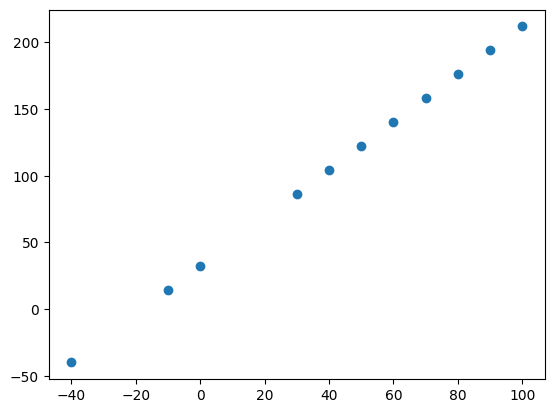

In [52]:
import matplotlib.pyplot as plt
plt.scatter(X_procesada, y_procesada)
plt.plot(X_procesada, modelo.predict(X_procesada))
plt.show()